In [2]:
from skimage.io import imshow, imshow_collection
import numpy as np
import matplotlib.pylab as plt
from skimage.morphology import binary_dilation, binary_erosion
from skimage import data

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imshow', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


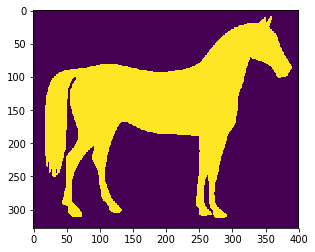

In [4]:
horse = data.horse() == 0
imshow(horse)

In [7]:
def skeleton(image, structure = None):
    skeleton = np.zeros(image.shape)
    S_all = []
    Y1 = image.copy()
    Y2 = binary_erosion(Y1, structure)
    while Y2.any():
        Y3 = binary_dilation(Y2, structure)
        Sn = Y1 ^ Y3
        S_all.append(Sn)
        skeleton = np.logical_or(skeleton, Sn)
        Y1 = Y2.copy()
        Y2 = binary_erosion(Y1, structure)
    Sn = Y1.copy()
    S_all.append(Sn)
    skeleton = np.logical_or(skeleton, Sn)
    return skeleton, S_all

In [5]:
def recover(skeleton, S_all, structure = None):
    image = np.zeros(skeleton.shape)
    for i in range(len(S_all), 0, -1):
        image = np.logical_or(image, S_all[i-1])
        image = binary_dilation(image, structure)
    return image

In [8]:
skel, s = skeleton(horse, np.ones((3,3)))
image = recover(skel, s, np.ones((3,3)))

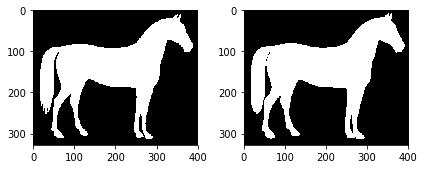

In [9]:
imshow_collection([horse, image])

In [10]:
skel, s = skeleton(horse)
image = recover(skel, s)

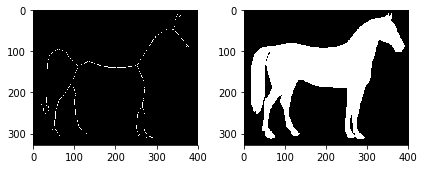

In [11]:
imshow_collection([skel, image])